# Análise Exploratoria do MovieLens by Fabio Kfouri

## Resumo

Durante a análise exploratoria do Movielens, foi possível realizar uma avaliação dos filmes classificando-os por genero e avalia-los sob a ótica da percepção da qualidada do filmes através de notas dadas pelos expectadores, e também avaliar a percepção da audiencia do filme pela quantidade de notas de avaliação. 

Foram realizado análises gráficas e testes estatísticos ao longo do desenvolvimento.


## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.0
Usando seaborn 0.9.0
Usando scipy 1.2.0


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [3]:
# solução
filmes = pd.read_csv('movies.csv', sep=',')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.set_index('filmeId')

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children
9,Sudden Death (1995),Action


In [4]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,filmeId,titulo,generos,ano_de_lancamento
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [7]:
# solução
notas = pd.read_csv('ratings.csv', sep=',')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [9]:
notas.query("filmeId == 1").nota.mean()

for index, row in filmes.iterrows():
    filmes.loc[index, "nota_media"] = notas.query("filmeId == " + str(row.filmeId)).nota.mean()
    #print("Id", index, row.filmeId, notas.query("filmeId == " + str(row.filmeId)).nota.mean())


In [10]:
filmes.head()

,filmeId,titulo,generos,ano_de_lancamento,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
4,5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [11]:
# solução para calcular o total de votos por filme

#criacao de um pandas.core.series.Series
quantidade_notas = notas.groupby('filmeId').nota.count() #

#type(quantidade_notas)

#convertendo em DataFrame
quantidade_notas = quantidade_notas.to_frame()

quantidade_notas.columns = ['qtd']
quantidade_notas.head()

,qtd
filmeId,
1,215
2,110
3,52
4,7
5,49


In [12]:
# solução para criar a nova coluna e filtrar os filmes
    
for ind in filmes.index:
    #print(filmeId)
    filmeId = filmes['filmeId'][ind]
    try:
        filmes.loc[ind, "total_de_votos"] = quantidade_notas["qtd"][filmeId]
    except:
        filmes.loc[ind, "total_de_votos"] = 0

filmesAntesLimpeza = filmes

filmes = filmes[filmes["total_de_votos"] > 49]

In [13]:
filmes.head()

,filmeId,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
5,6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
6,7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0.5, 1.0, 'Media de votos dos filmes com 50 ou mais votos')

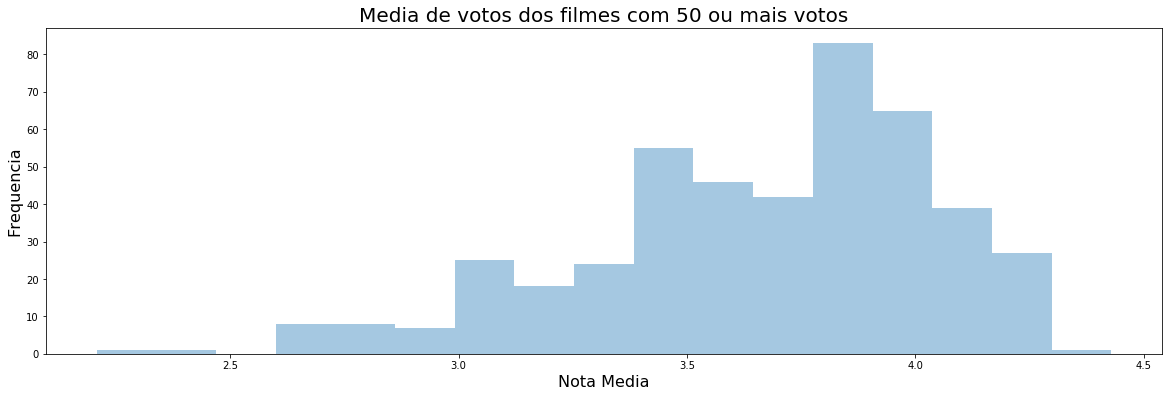

In [19]:
# solução histograma
ax = sns.distplot(filmes.nota_media, norm_hist=False, kde=False)
ax.figure.set_size_inches(20, 6)
ax.set_xlabel('Nota Media', fontsize=16)
ax.set_ylabel('Frequencia', fontsize=16)
ax.set_title("Media de votos dos filmes com 50 ou mais votos", fontsize=20)

Text(0.5, 1.0, 'Média cumulativa de votos em filmes com 50 ou mais votos')

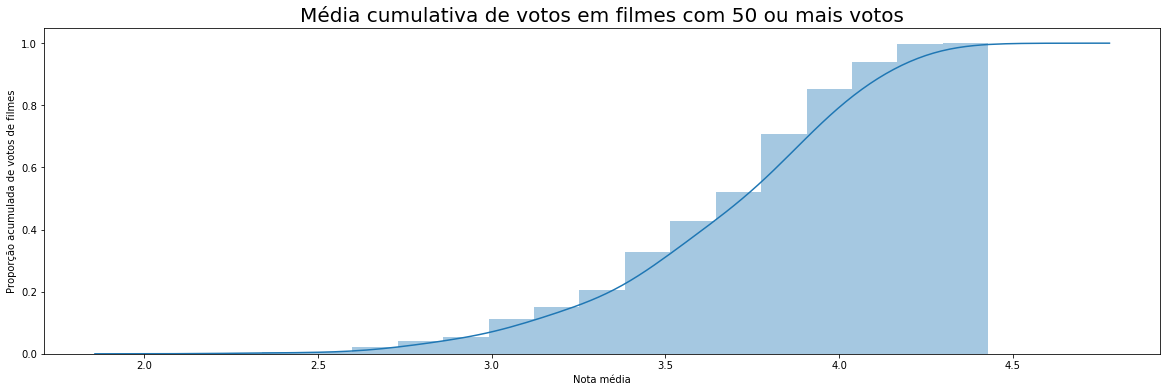

In [24]:
# solução cumulativa
ax = sns.distplot(filmes.nota_media, 
                  hist_kws = {'cumulative':True}, 
                  kde_kws = {'cumulative':True})
ax.figure.set_size_inches(20, 6)
ax.set(xlabel='Nota média', ylabel='Proporção acumulada de votos de filmes')
ax.set_title('Média cumulativa de votos em filmes com 50 ou mais votos', fontsize=20)

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0.5, 1.0, 'Quantidade de votos dos filmes mais avaliados')

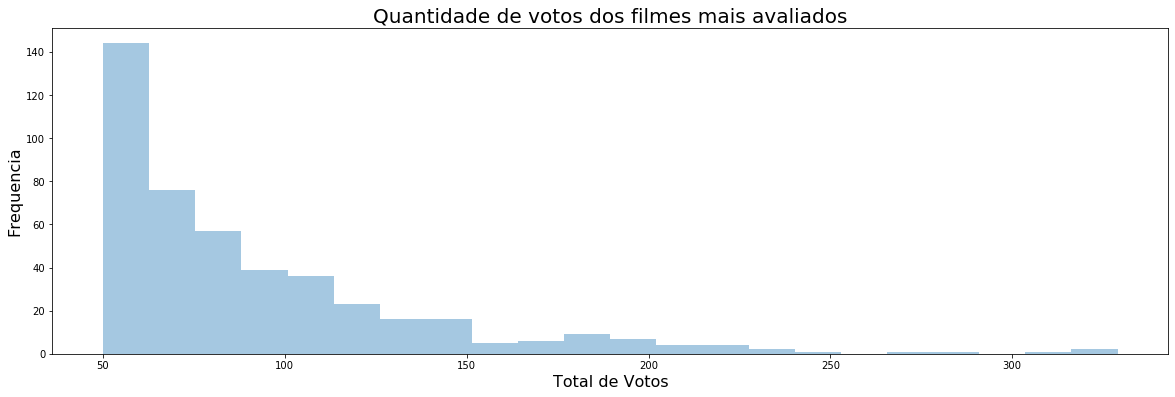

In [23]:
# solução histograma
ax = sns.distplot(filmes.total_de_votos, norm_hist=False, kde=False)
ax.figure.set_size_inches(20, 6)
ax.set_xlabel('Total de Votos', fontsize=16)
ax.set_ylabel('Frequencia', fontsize=16)
ax.set_title("Quantidade de votos dos filmes mais avaliados", fontsize=20)

Text(0.5, 1.0, 'Quantidade de votos cumulativos em filmes mais avaliados')

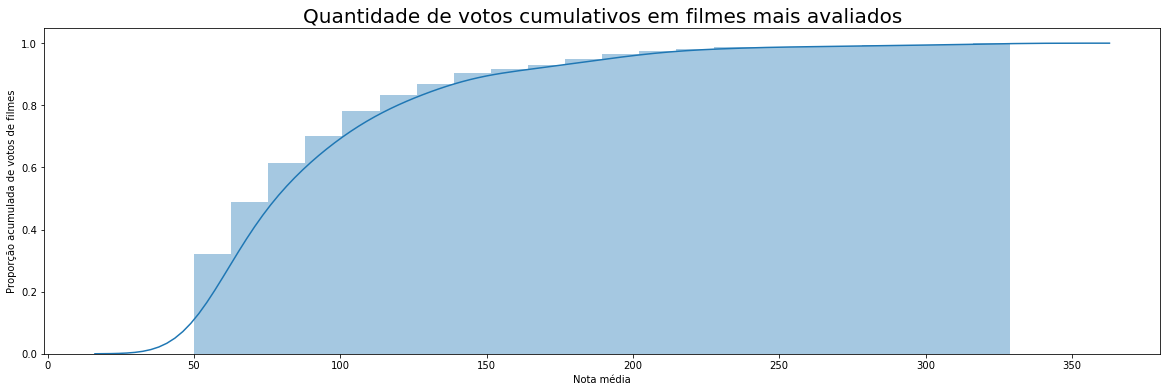

In [26]:
# solução cumulativa
ax = sns.distplot(filmes.total_de_votos, 
                  hist_kws = {'cumulative':True}, 
                  kde_kws = {'cumulative':True})
ax.figure.set_size_inches(20, 6)
ax.set(xlabel='Nota média', ylabel='Proporção acumulada de votos de filmes')
ax.set_title('Quantidade de votos cumulativos em filmes mais avaliados', fontsize=20)

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [33]:
# solução
nota_limite_dos_20_porcento = filmes.nota_media.quantile(1 - 0.2)

In [34]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [51]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies( ) #https://www.w3resource.com/pandas/get_dummies.php
print("Temos %d generos distintos em uma amostra com %d filmes." %(generos.shape[1], generos.shape[0]))


Temos 19 generos distintos em uma amostra com 450 filmes.


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,filmeId,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

In [155]:
# solução
filmes_por_genero = list()

# Iterating over Columns
for col in list(generos):
    filmes_por_genero.append(generos[col].sum())
   
# convert list to Pandas.Series
filmes_por_genero = pd.Series(filmes_por_genero, index = list(generos)) #https://www.geeksforgeeks.org/creating-a-pandas-series/
filmes_por_genero.sort_values(inplace=True, ascending=False)
filmes_por_genero.head()

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64

Text(0.5, 1.0, 'Quantidade de filmes com 50 ou mais avaliações por gênero')

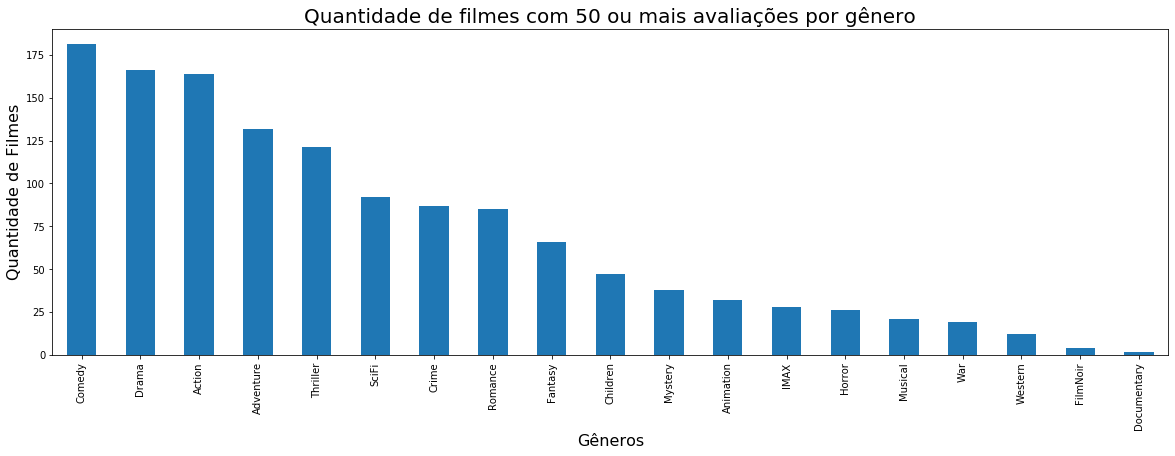

In [156]:
#Creating a bar chart throw pandas library
ax = filmes_por_genero.plot.bar()
ax.figure.set_size_inches(20, 6)
ax.set_xlabel('Gêneros', fontsize=16)
ax.set_ylabel('Quantidade de Filmes', fontsize=16)
ax.set_title("Quantidade de filmes com 50 ou mais avaliações por gênero", fontsize=20)

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [157]:
# solução
top5_generos_em_quantidade_de_filmes = filmes_por_genero[0:5]
filmes_por_genero

Comedy         181
Drama          166
Action         164
Adventure      132
Thriller       121
SciFi           92
Crime           87
Romance         85
Fantasy         66
Children        47
Mystery         38
Animation       32
IMAX            28
Horror          26
Musical         21
War             19
Western         12
FilmNoir         4
Documentary      2
dtype: int64

In [158]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [159]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [251]:
# solucão
votos_por_genero = list()

# Iterating over Columns
for col in list(votos_por_genero_por_filme):
    votos_por_genero.append(votos_por_genero_por_filme[col].sum())
   
# convert list to Pandas.Series
votos_por_genero = pd.Series(votos_por_genero, index = list(votos_por_genero_por_filme)) #https://www.geeksforgeeks.org/creating-a-pandas-series/

# sort values
votos_por_genero.sort_values(inplace=True, ascending=False)

votos_por_genero

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

Text(0.5, 1.0, 'Quantidade de Votos por gênero')

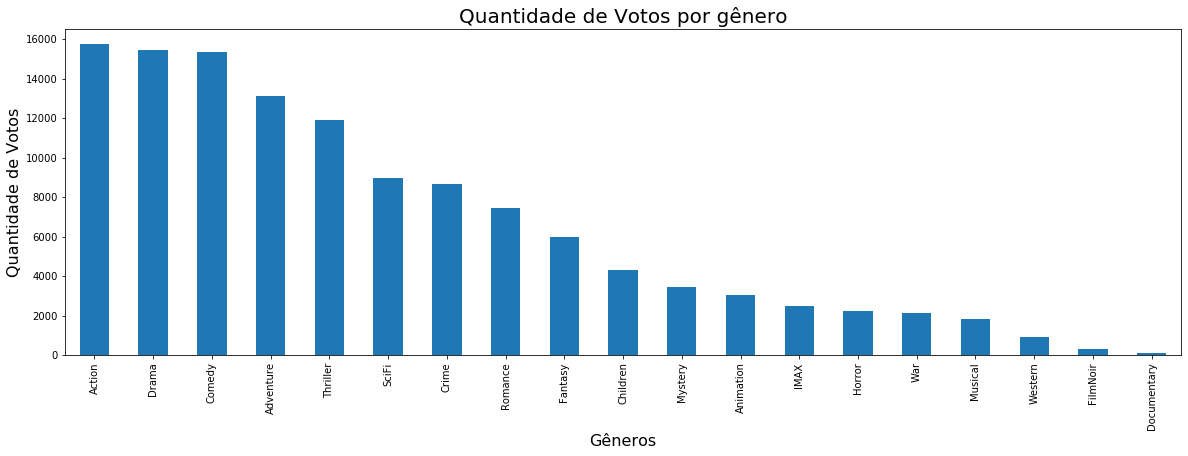

In [252]:
# solução
ax = votos_por_genero.plot.bar()
ax.figure.set_size_inches(20, 6)
ax.set_xlabel('Gêneros', fontsize=16)
ax.set_ylabel('Quantidade de Votos', fontsize=16)
ax.set_title("Quantidade de Votos por gênero", fontsize=20)

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [165]:
# solucao código
avaliacao_filmes = pd.DataFrame({"filmes" : filmes_por_genero, "total_de_votos" : visualizacoes_por_genero})
avaliacao_filmes['votos_por_filme'] = round(avaliacao_filmes['total_de_votos'] / avaliacao_filmes['filmes'],2)
avaliacao_filmes.sort_values(inplace=True, ascending=False, by = ['votos_por_filme'])
avaliacao_filmes

,filmes,total_de_votos,votos_por_filme
War,19,2113.0,111.21
Crime,87,8649.0,99.41
Adventure,132,13117.0,99.37
Thriller,121,11907.0,98.40
SciFi,92,8989.0,97.71
Action,164,15734.0,95.94
Animation,32,3066.0,95.81
Drama,166,15445.0,93.04
Children,47,4331.0,92.15
Mystery,38,3452.0,90.84


Text(0.5, 1.0, 'Quantidade de Votos por filme por gênero')

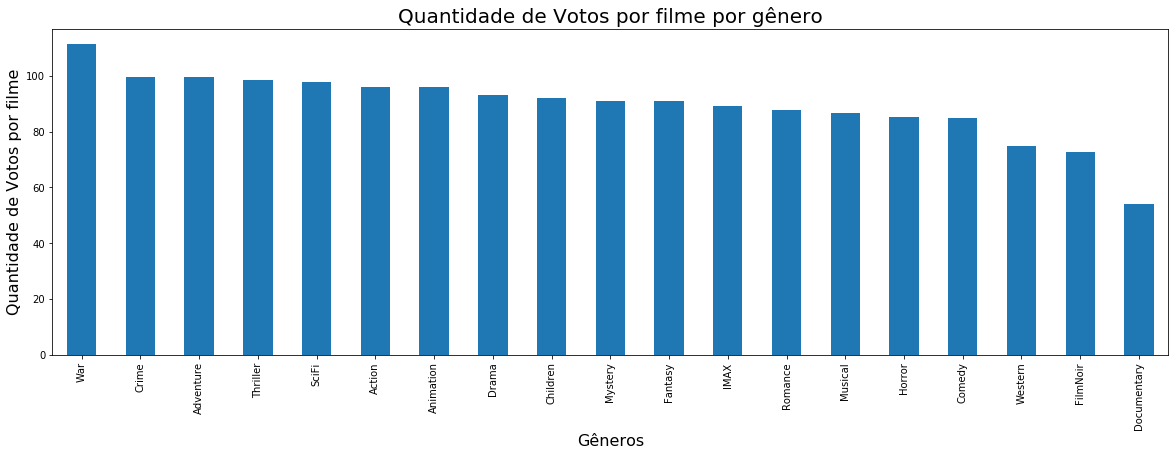

In [166]:
# solução com visualização 
ax = avaliacao_filmes.votos_por_filme.plot.bar()
ax.figure.set_size_inches(20, 6)
ax.set_xlabel('Gêneros', fontsize=16)
ax.set_ylabel('Quantidade de Votos por filme', fontsize=16)
ax.set_title("Quantidade de Votos por filme por gênero", fontsize=20)

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
<p style='color:red'>
    Os filmes tipo ACTION estão entre os filmes preferidos dos expectadores, tem um publico bem participativo e ávidos por este genero, visto a quantidade de filmes disponíveis. Canal excelente para obtenção de feedbacks. 
</p>  
    
<p style='color:red'>
    Os filmes tipo WAR não estão entre os filmes preferidos entre os expectadores, e por isso, que deve existir poucos de filmes deste genero. No entando, o público que assiste a esse genero são muito mais participativos do que qualquer outro gênero. Deve existir um elevado nível de fidelidade e criticidade do publico para este tipo  genero. 
</p>

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

Text(0.5, 1.0, 'Distribuicao de total de votos por genero')

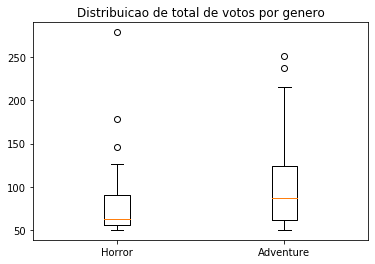

In [209]:
# solução:
import matplotlib.pyplot as plt

plt.boxplot([filmes.query("Horror == 1").total_de_votos, filmes.query("Adventure == 1").total_de_votos], labels=["Horror", "Adventure"])
plt.title("Distribuicao de total de votos por genero")

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

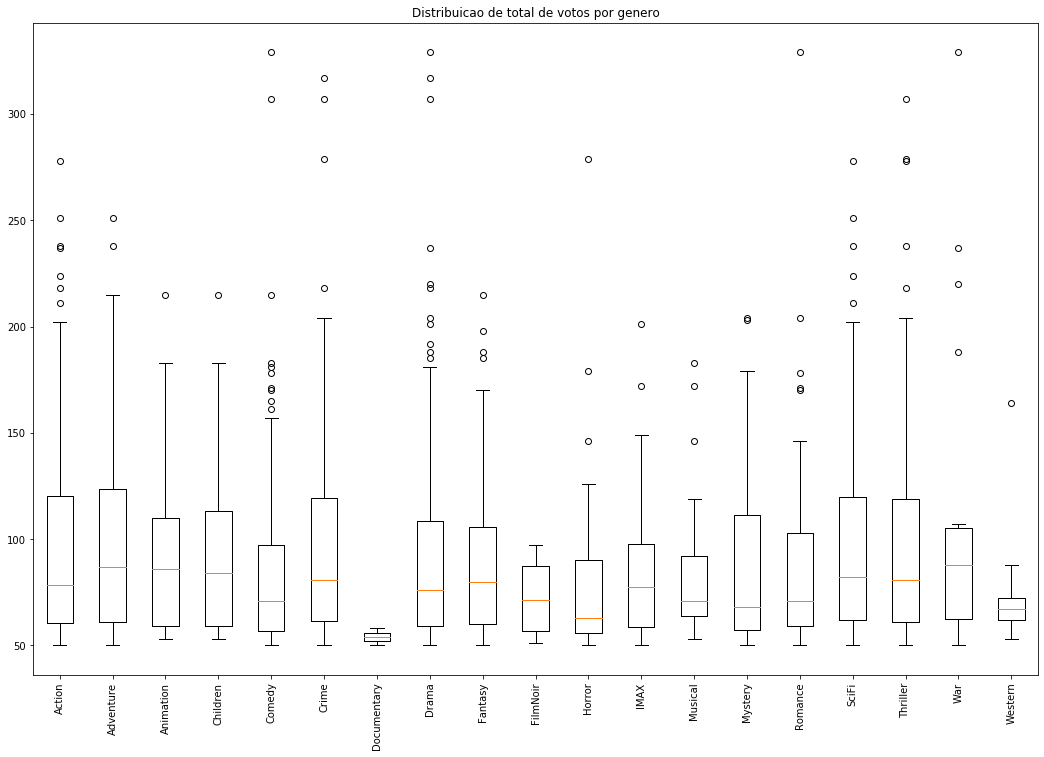

In [212]:
categorias = list()

filmes.shape
for i in range(5, filmes.shape[1]):
    #print(list(filmes)[i])
    categorias.append(filmes.query(list(filmes)[i]+ " == 1").total_de_votos)

#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.html

plt.boxplot(categorias, labels=list(filmes)[5:filmes.shape[1]], )
plt.title("Distribuicao de total de votos por genero")
plt.xticks(rotation=90)

fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 3 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size)


## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
    
<p style="color:red">
    A minha sugestão é para que crie um filme do genero ADVENTURE pois é o quarto genero preferido do público, tem uma boa audiência e a costuma ter um melhor retorno em quantidade de votos para analises futuras.
</p>

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Distribuicao de quantidade de votos para o genero Aventura')

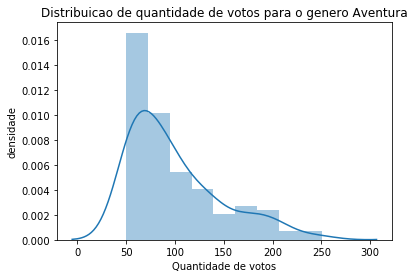

In [229]:
# solucao histograma de aventura
adventure = filmes.query("Adventure==1")

ax = sns.distplot(adventure.total_de_votos)
ax.set(xlabel="Quantidade de votos", ylabel = "densidade")
ax.set_title("Distribuicao de quantidade de votos para o genero Aventura")


Text(0.5, 1.0, 'Distribuicao de quantidade de votos para o genero Horror')

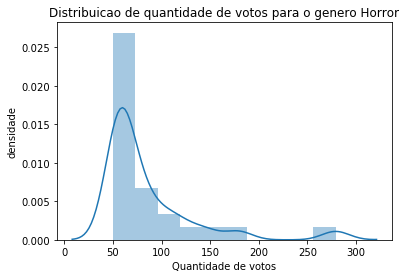

In [230]:
# solucao histograma de horror
horror = filmes.query("Horror==1")

ax = sns.distplot(horror.total_de_votos)
ax.set(xlabel="Quantidade de votos", ylabel = "densidade")
ax.set_title("Distribuicao de quantidade de votos para o genero Horror")


In [240]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

from scipy.stats import normaltest
_, p_adventure = normaltest(adventure.total_de_votos)
_, p_horror = normaltest(horror.total_de_votos)
print("P Value for Adventure: ", p_adventure, " and P Value for Horror:", p_horror)

P Value for Adventure:  5.987863006199139e-06  and P Value for Horror: 1.2786148884334685e-07


<p style="color:red"> Não é possível aplicar um teste de normalidade do tipo Z-Test (amostra acima de 50) pois a distribuição de nenhum dos generos Aventura e Horror são do tipo normal. As caudas de ambos os gráficos tendem ser maiores do lado direito, enquanto que do lado esquerdo estão limitados pela limpeza realizada no início do exercício para filmes com no mínimo 50 votos.</p>

<p style="color:red">    
    Ao realizar o teste de normalidade, foi verificado um P Value muito baixo para ambos os generos. Como a função testa a hipótese nula de que o conjunto de dados venha de uma distribuição normal, um resultado menor que 0.05 indica que não estamos trabalhando com uma distribuição normal.
</p>

In [243]:
# solução com o teste desejado
from scipy.stats import ranksums
_, p = ranksums(adventure.total_de_votos, horror.total_de_votos)
p


0.04782366231999856

### Solução (explique sua conclusão):

<p style="color:red"> Nesse caso, o p value é ligeiramente menor, mas por criterio de arredondamento é exatamente 0,05. Isto significa que os filmes do genero ADVENTURE vão ter mais votos que do genero HORROR o que significa também ter uma maior audiencia. </p>

<p style="color:red">Assim, a recomendação permanesce as mesma, para que se faça filme do genero ADVENTURE em detrimento a filmes do genero HORROR</p>

## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0.5, 1.0, 'Distribuicao de notas médias por genero')

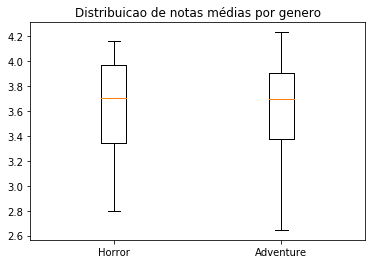

In [245]:
# solução:
plt.boxplot([filmes.query("Horror == 1").nota_media, filmes.query("Adventure == 1").nota_media], labels=["Horror", "Adventure"])
plt.title("Distribuicao de notas médias por genero")

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:

<p style="color:red">Neste caso, como o foco é a média de notas e não a audiencia, a sugestão é para que faça filmes do genero HORROR, pois pela análise gráfica do boxplot, as notas para este genero parecem ter um limite superior do terceiro quartil ligeiramente maior que os filmes do genero ADVENTURE. As medianas parecem ser iguais. </p>

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Distribuicao da media de notas para o genero Aventura')

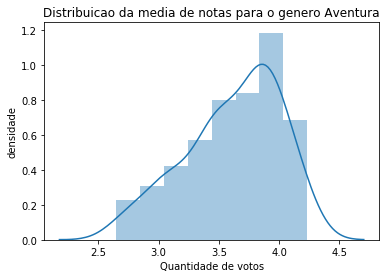

In [246]:
# solucao histograma de aventura
adventure = filmes.query("Adventure==1")

ax = sns.distplot(adventure.nota_media)
ax.set(xlabel="Quantidade de votos", ylabel = "densidade")
ax.set_title("Distribuicao da media de notas para o genero Aventura")

Text(0.5, 1.0, 'Distribuicao da media de notas para o genero Horror')

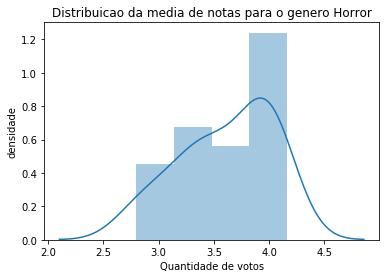

In [247]:
# solucao histograma de horror
horror = filmes.query("Horror==1")

ax = sns.distplot(horror.nota_media)
ax.set(xlabel="Quantidade de votos", ylabel = "densidade")
ax.set_title("Distribuicao da media de notas para o genero Horror")

In [248]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
_, p_adventure = normaltest(adventure.nota_media)
_, p_horror = normaltest(horror.nota_media)
print("P Value for Adventure: ", p_adventure, " and P Value for Horror:", p_horror)


P Value for Adventure:  0.012835697582553224  and P Value for Horror: 0.21186284682483916


In [249]:
# solução com o teste desejado
_, p = ranksums(adventure.nota_media, horror.nota_media)
p

0.8310397344212459

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
<p style="color:red">
Pelo teste de normalidade das notas médias, vimos para as notas do genero ADVENTURE não esta trabalhando em uma distribuiçao normal, diferentemente do genero HORROR que tem um p maior que 0.05, o que significa que existe uma maior a possibilidade de obter notas dentro da normalidade. Isso é bom, pois existe maior previsibilidade sobre as medias de notas para este tipo de genero. 
</p>

<p style="color:red">
    Já o teste do P Value através do ranksums, mostrou um valor bem acima do 0.05. Porém será ignorado pois existe uma comparaçao entre amostras parametricas e não parametricas.
</p>

<p style="color:red">Assim, a sugestão permance para filmes do genero HORROR.</p>

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:

<p style="color:red">A recomendação será para filmes do tipo ADVENTURE, pois alem de serem mais assistidos, possuem a mediana das notas médias praticamente iguais.</p>

## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [253]:
votos_por_genero

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

In [256]:
# solução: calculando os 2 generos mais votados
top2_generos = votos_por_genero[0:2]
top2_generos

Action    15734.0
Drama     15445.0
dtype: float64

In [269]:
# solução: encontrando os top 5 filmes desses generos
top5_filmes = filmes.query("Action == 1 or Drama == 1").sort_values(by = ['nota_media'], ascending=False)[0:5]
top5_filmes


,filmeId,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
277,318,"Shawshank Redemption, The (1994)",1994.0,4.429022,317.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
659,858,"Godfather, The (1972)",1972.0,4.289062,192.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2226,2959,Fight Club (1999),1999.0,4.272936,218.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
975,1276,Cool Hand Luke (1967),1967.0,4.271930,57.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
922,1221,"Godfather: Part II, The (1974)",1974.0,4.259690,129.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [297]:
# solucao
ignore = ["filmeId", "ano_de_lancamento", "nota_media", "total_de_votos"]
max, min = 0, 0
maxRef, minRef = "", ""
for index, row in filmes.corr().iterrows():
    if index not in ignore:
        #print(row.nota_media, index )
        if row.nota_media > max :
            max = row.nota_media
            maxRef = index
        if row.nota_media < min :
            min = row.nota_media
            minRef = index
  
print("%s é o genero com a maior correlaçao (%.4f) e %s é o genero com menor correcao (%.4f) com notas medias" % (maxRef, max, minRef, min) )

Drama é o genero com a maior correlaçao (0.2777) e Comedy é o genero com menor correcao (-0.2560) com notas medias


## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [341]:
# solucao
ignore = ["filmeId", "ano_de_lancamento", "nota_media", "total_de_votos"]
max, min = 0, 0
maxRef, minRef = "", ""
for index, row in filmes.corr().iterrows():
    if index not in ignore:
        #print(row.nota_media, index )
        if row.total_de_votos > max :
            max = row.total_de_votos
            maxRef = index
        if row.total_de_votos < min :
            min = row.total_de_votos
            minRef = index
  
print("%s é o genero com a maior correlaçao (%.4f) e %s é o genero com menor correcao (%.4f) com total de votos." % (maxRef, max, minRef, min) )


Adventure é o genero com a maior correlaçao (0.1044) e Comedy é o genero com menor correcao (-0.1285) com total de votos.


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

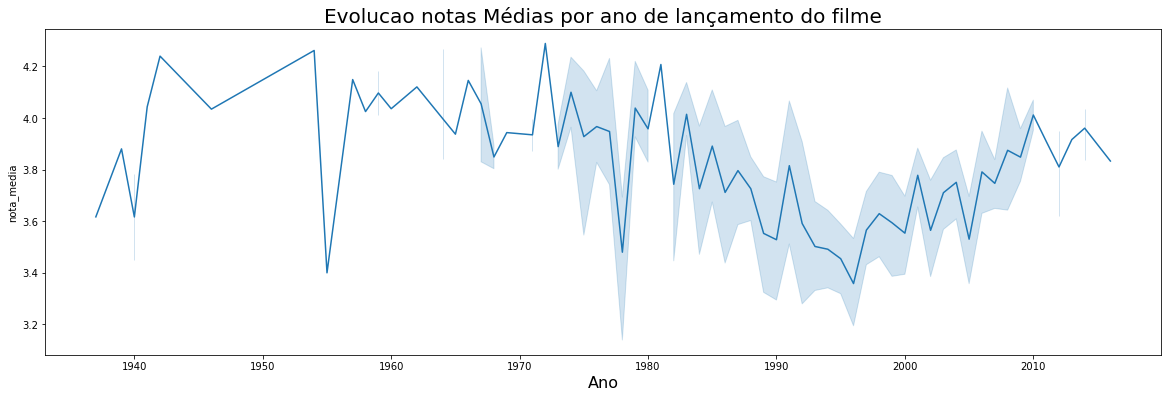

In [307]:
# solucao
ax = sns.lineplot(x="ano_de_lancamento", y="nota_media", data = filmes)
ax.figure.set_size_inches(20, 6)
ax.set_title('Evolucao notas Médias por ano de lançamento do filme', fontsize=20)
ax.set_xlabel('Ano', fontsize=16)
ax

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [318]:
# solução (código)
filmes.corr().round(4).query("ano_de_lancamento == 1").nota_media
#filmes.groupby("ano_de_lancamento").nota_media.mean() #.query("ano_de_lancamento < 1994")

ano_de_lancamento   -0.1591
Name: nota_media, dtype: float64

### Solução (explicação)

<p style="color:red">O valor -0.1591 representa uma correlação muito fraca entre ano_de_lancamento e nota_media. Por uma análise gráfica do lineplot é possível verificar que havia uma tendência das notas cairem entre a metade dos anos 1970 e final dos anos 90. Esta tendencia pode justificar alguma relação de linearidade entre o ano_de_lancamento e nota_media. Sobre o "problema" que pode ser gerado, e a captaçao filmes com quantidade irrelevante de votos para análise.</p>

## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

Text(0.5, 1.05, 'Dispersão entre as Variáveis')

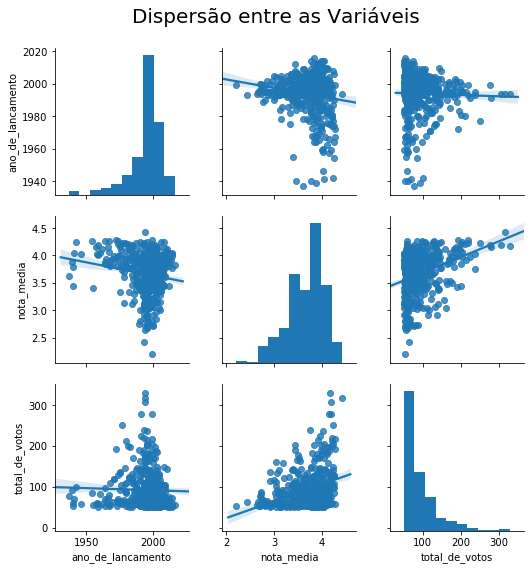

In [345]:
# solução
infos = filmes[["ano_de_lancamento", "nota_media", "total_de_votos"]]
ax = sns.pairplot(infos, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

Text(0.5, 1.05, 'Dispersão entre as Variáveis segregando o genero Animation')

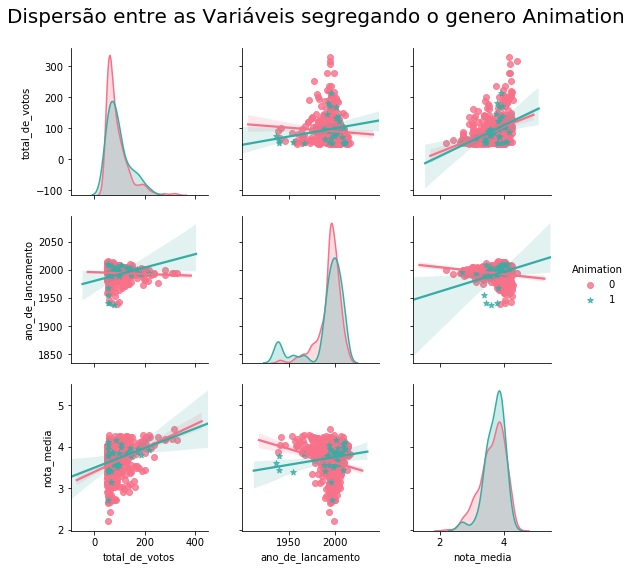

In [364]:
infos_animation = filmes[["total_de_votos", "ano_de_lancamento", "nota_media", "Animation"]]
ax = sns.pairplot(infos_animation, y_vars = ["total_de_votos", "ano_de_lancamento", "nota_media"], x_vars = ["total_de_votos", "ano_de_lancamento", "nota_media"], kind='reg', hue='Animation', markers=['o', '*'], palette = 'husl' )
ax.fig.suptitle('Dispersão entre as Variáveis segregando o genero Animation', fontsize=20, y=1.05)
#infos_animation

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:

<p style="color:red">A correlação entre nota_media e ano_de_lancamento para filmes do genero Animation parecem ter uma relação linear positiva fraca. Pode indicar melhora da percepção da qualidade dos filmes do genero.</p>

<p style="color:red">A correlação entre ano_de_lancamento e total_de_votos para filmes do genero Animation parecem ter uma relação linear positiva razoavel. Pode indicar um aumento da audiência para filmes deste genero.</p>

<p style="color:red">Sobre as outras categorias, parece haver uma relação linear negativa para o ano_de_lancamento e a nota_media. Mas pela analise no grafico lineplot pudemos verificar que houve uma relaçao deste tipo durante alguns anos entre meados da decada de 1970 e fim da decada de 1990.</p>

<p style="color:red">A partir do ano 1999 houve uma revolução no modelo de desenvolvimento do cinema. Marcou o fim da era Hollywood e o começo de uma nova era no cinema promovido por novos diretores e produtoras independentes. Esse foi o marco que culminou com uma nova percepção da qualidade dos filmes a partir deste ano. No gráfico lineplot é possível identificar que a partir de 1999 houve melhora na percepçao da qualidade dos filmes. 
</p>

Fontes:
- https://www1.folha.uol.com.br/ilustrada/2019/01/entenda-por-que-1999-gerou-obras-primas-como-matrix-e-o-sexto-sentido.shtml
- https://www.huffpostbrasil.com/entry/10-melhores-filmes-de1999_br_5c8ff747e4b04ed2c1ad5969

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

Text(0.5, 1.05, 'Dispersão entre as Variáveis segregando o genero Animation')

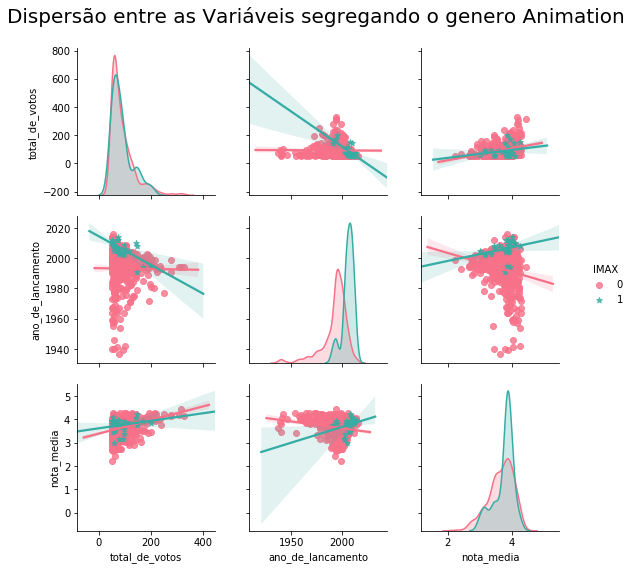

In [397]:
# solução
infos_imax = filmes[["total_de_votos", "ano_de_lancamento", "nota_media", "IMAX"]]#.query("IMAX==1")
ax = sns.pairplot(infos_imax, y_vars = ["total_de_votos", "ano_de_lancamento", "nota_media"], x_vars = ["total_de_votos", "ano_de_lancamento", "nota_media"], kind='reg', hue='IMAX', markers=['o', '*'], palette = 'husl' )
ax.fig.suptitle('Dispersão entre as Variáveis segregando o genero Animation', fontsize=20, y=1.05)

<p style="color:red">Neste exemplo quis fazer uma analise mais aprofundada sobre os filmes genero IMAX. Que na verdade não é um genero de filme, mas sim, uma classificação para um tipo de Tecnologia utilizada durante a filmagem para captaçao de imagens em alta resolução (ex. 8K)</p>

<p style="color:red">Primeiramente foi identificado que o uso deste tipo de tecnologia começou no meio da década de 1990, ou seja, não havia tecnologia IMAX disponível antes disso.</p>

<p style="color:red">O Uso de tecnologia IMAX é muito mais cara do que a produçao de filmes utilizando-se da tecnologia padrão. O uso desta tecnologia não melhorou a audiencia, visto que a relação entre total_de_votos e ano_de_lancamento tem uma relação linear negativa bastante acentuada. Talvez isso seja justificada pela baixa quantidade de salas de cinemas com tecnologia IMAX e também pela distância do uso dessa tecnologia em residências.</p>

<p style="color:red">Outra hipotese é de que ao longo dos anos tem melhorado a percepção da qualidade dos filmes que utilizam a tecnologia IMAX. Visto na relação entre ano_de_lancamento e nota_media.</p>